<a href="https://colab.research.google.com/github/Cal-Poly-Data-301/lab-2-phase-1-evelyntr/blob/main/Copy_of_DATA_301_Lab_2A_Evelyn_Tran%2C_(Brandon_Brownell%2C_Erik_Luu).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Shark Tank

_Shark Tank_ is a reality TV show. Contestants present their idea for a company to a panel of investors (a.k.a. "sharks"), who then decide whether or not to invest in that company.  The investors give a certain amount of money in exchange for a percentage stake in the company ("equity"). If you are not familiar with the show, you may want to watch part of an episode [here](http://abc.go.com/shows/shark-tank) to get a sense of how it works.

The data that you will examine in this lab contains data about all contestants from the first 6 seasons of the show, including:
- the name and industry of the proposed company
- whether or not it was funded (i.e., the "Deal" column)
- which sharks chose to invest in the venture (N.B. There are 7 regular sharks, not including "Guest". Each shark has a column in the data set, labeled by their last name.)
- if funded, the amount of money the sharks put in and the percentage equity they got in return

To earn full credit on this lab, you should:
- use built-in `pandas` methods (like `.sum()` and `.max()`) instead of writing a for loop over a `DataFrame` or `Series`
- use the split-apply-combine pattern wherever possible

Of course, if you can't think of a vectorized solution, a `for` loop is still better than no solution at all!

In [ ]:
import pandas as pd

## Question 0. Getting and Cleaning the Data

The data is stored in the CSV file `https://dlsun.github.io/pods/data/sharktank.csv`. Read in the data into a Pandas `DataFrame`.



In [ ]:
pd.read_csv("https://dlsun.github.io/pods/data/sharktank.csv")

,Season,No. in series,Company,Deal,Industry,Entrepreneur Gender,Amount,Equity,Corcoran,Cuban,Greiner,Herjavec,John,O'Leary,Harrington,Guest,Details / Notes
0,1.0,1.0,Ava the Elephant,Yes,Healthcare,Female,"$50,000",55%,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,Mr. Tod's Pie Factory,Yes,Food and Beverage,Male,"$460,000",50%,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2,1.0,1.0,Wispots,No,Business Services,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,College Foxes Packing Boxes,No,Lifestyle / Home,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,1.0,Ionic Ear,No,Uncertain / Other,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,6.0,28.0,You Kick Ass,Yes,Children / Education,Female,"$100,000",10%,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
491,6.0,29.0,Shark Wheel,Yes,Fitness / Sports,Male,"$225,000",8%,NaN,1.0,NaN,1.0,NaN,NaN,NaN,1.0,10% royalty until $500K; then converts to 5% e...
492,6.0,29.0,Gato Cafe,No,Uncertain / Other,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
493,6.0,29.0,Sway Motorsports,Yes,Green/CleanTech,Male,"$300,000",20%,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There is one column for each of the sharks. A 1 indicates that they chose to invest in that company, while a missing value indicates that they did not choose to invest in that company. Notice that these missing values show up as NaNs when we read in the data. Fill in these missing values with zeros. Other columns may also contain NaNs; be careful not to fill those columns with zeros, or you may end up with strange results down the line.

In [ ]:
import pandas as pd

df_sharks = pd.read_csv("https://dlsun.github.io/pods/data/sharktank.csv")
df_sharks["Corcoran"] = df_sharks["Corcoran"].fillna(0)
df_sharks["Cuban"] = df_sharks["Cuban"].fillna(0)
df_sharks["Greiner"] = df_sharks["Greiner"].fillna(0)
df_sharks["Herjavec"] = df_sharks["Herjavec"].fillna(0)
df_sharks["John"] = df_sharks["John"].fillna(0)
df_sharks["O'Leary"] = df_sharks["O'Leary"].fillna(0)
df_sharks["Harrington"] = df_sharks["Harrington"].fillna(0)
df_sharks["Guest"] = df_sharks["Guest"].fillna(0)

df_sharks

,Season,No. in series,Company,Deal,Industry,Entrepreneur Gender,Amount,Equity,Corcoran,Cuban,Greiner,Herjavec,John,O'Leary,Harrington,Guest,Details / Notes
0,1.0,1.0,Ava the Elephant,Yes,Healthcare,Female,"$50,000",55%,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,1.0,1.0,Mr. Tod's Pie Factory,Yes,Food and Beverage,Male,"$460,000",50%,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN
2,1.0,1.0,Wispots,No,Business Services,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,1.0,1.0,College Foxes Packing Boxes,No,Lifestyle / Home,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,1.0,1.0,Ionic Ear,No,Uncertain / Other,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,6.0,28.0,You Kick Ass,Yes,Children / Education,Female,"$100,000",10%,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
491,6.0,29.0,Shark Wheel,Yes,Fitness / Sports,Male,"$225,000",8%,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,10% royalty until $500K; then converts to 5% e...
492,6.0,29.0,Gato Cafe,No,Uncertain / Other,Female,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
493,6.0,29.0,Sway Motorsports,Yes,Green/CleanTech,Male,"$300,000",20%,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


Notice that Amount and Equity are currently being treated as categorical variables (`dtype: object`). Can you figure out why this is? Clean up these columns and cast them to numeric types (i.e., a `dtype` of `int` or `float`) because we'll need to perform mathematical operations on these columns.

In [ ]:

df_sharks["Amount"] = df_sharks["Amount"].str.replace(',', '')
df_sharks["Amount"] = df_sharks["Amount"].str.replace('$', '')
df_sharks["Amount"] = df_sharks["Amount"].astype(float)

df_sharks["Equity"] = df_sharks["Equity"].str.rstrip('%')
df_sharks["Equity"] = df_sharks["Equity"].astype(float)
df_sharks["Equity"] = df_sharks["Equity"] / 100
df_sharks

,Season,No. in series,Company,Deal,Industry,Entrepreneur Gender,Amount,Equity,Corcoran,Cuban,Greiner,Herjavec,John,O'Leary,Harrington,Guest,Details / Notes
0,1.0,1.0,Ava the Elephant,Yes,Healthcare,Female,50000.0,0.55,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,1.0,1.0,Mr. Tod's Pie Factory,Yes,Food and Beverage,Male,460000.0,0.50,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN
2,1.0,1.0,Wispots,No,Business Services,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,1.0,1.0,College Foxes Packing Boxes,No,Lifestyle / Home,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,1.0,1.0,Ionic Ear,No,Uncertain / Other,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,6.0,28.0,You Kick Ass,Yes,Children / Education,Female,100000.0,0.10,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
491,6.0,29.0,Shark Wheel,Yes,Fitness / Sports,Male,225000.0,0.08,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,10% royalty until $500K; then converts to 5% e...
492,6.0,29.0,Gato Cafe,No,Uncertain / Other,Female,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
493,6.0,29.0,Sway Motorsports,Yes,Green/CleanTech,Male,300000.0,0.20,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


I believe amount and equity are treated as categorical variables because while there are 495 companies, there is a limited number of unique Amount and Equity. We can check this by running df_shark["Amount"].unique() and df_shark["Equity"].unique(). The program was looking at them as recurring labels. 

## Question 1. Which Company was Worth the Most?

The valuation of a company is how much it is worth. If someone invests \$10,000 for a 40% equity stake in the company, then this means the company must be valued at \$25,000, since 40% of \$25,000 is \$10,000.

Calculate the valuation of each company that was funded. Which company was most valuable? Is it the same as the company that received the largest total investment from the sharks?

In [ ]:
# .4(x) = 10000 -> x = amount / equity 
df_sharks["Valuation"] = df_sharks["Amount"] / df_sharks["Equity"]
df_sharks.loc[df_sharks["Valuation"].idxmax()]

Season                                                        5
No. in series                                                13
Company                                        The Wall DoctoRX
Deal                                                        Yes
Industry                                       Lifestyle / Home
Entrepreneur Gender                                        Male
Amount                                                   150000
Equity                                                        0
Corcoran                                                      0
Cuban                                                         0
Greiner                                                       0
Herjavec                                                      1
John                                                          0
O'Leary                                                       0
Harrington                                                    0
Guest                                   

In [ ]:
df_sharks.loc[df_sharks["Amount"].idxmax()]

Season                                                                 6
No. in series                                                         27
Company                                                           AirCar
Deal                                                                 Yes
Industry                                                 Green/CleanTech
Entrepreneur Gender                                                 Male
Amount                                                             5e+06
Equity                                                               0.5
Corcoran                                                               0
Cuban                                                                  0
Greiner                                                                0
Herjavec                                                               1
John                                                                   0
O'Leary                                            

The Wall DoctoRX was determined to be the most valuable, but it is not the same company that received the largest total investment. The company that received the largest investment from the sharks was AirCar.

## Question 2. Which Shark Invested the Most?

Calculate the total amount of money that each shark invested over the 6 seasons. Which shark invested the most total money over the 6 seasons?

_Hint:_ If $n$ sharks funded a given venture, then the amount that each shark invested is the total amount divided by $n$.

In [ ]:
sharks = ["Corcoran", "Cuban", "Greiner", "Herjavec", "John", "O'Leary", "Harrington"]

df_sharks["Number of Investors"] = df_sharks.iloc[:,8:16].sum(axis=1)
for i in range(len(df_sharks)):
  for shark in sharks:
    if df_sharks.loc[i, shark] == 1.0:
      df_sharks.loc[i,shark] = df_sharks.loc[i,"Amount"] / df_sharks.loc[i,"Number of Investors"]

df_sharks
df_sharks.iloc[:,8:16].describe().sum()


Corcoran      3.480776e+05
Cuban         2.192867e+06
Greiner       5.790448e+05
Herjavec      5.303182e+06
John          5.809424e+05
O'Leary       2.643857e+06
Harrington    2.163287e+05
Guest         4.961217e+02
dtype: float64

Herjavec invested the most money at $5,303,182

## Question 3. Do the Sharks Prefer Certain Industries?

Calculate the funding rate (the proportion of companies that were funded) for each industry. Make a visualization showing this information.

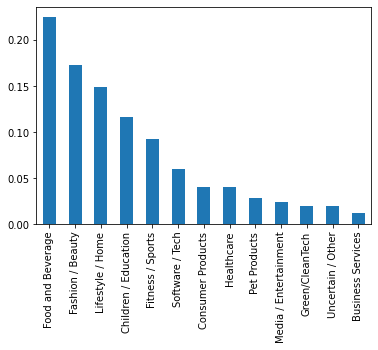

In [ ]:
df_sharks = df_sharks[df_sharks["Deal"] == 'Yes']
total_deals = df_sharks["Deal"].count()
industry_counts = df_sharks["Industry"].value_counts() / total_deals

industry_counts.plot.bar()

Based on the bar chart, we can see that the Food and Beverage industry has the highest funding rate. 

## Submission Instructions

- Copy this notebook to your own Drive, if you have not already.
- Restart this notebook and run the cells from beginning to end. 
  - Go to Runtime > Restart and Run All.
- Rename this notebook by clicking on "DATA 301 Lab 2A - YOUR NAMES HERE" at the very top of this page. Replace "YOUR NAMES HERE" with the first and last names of you (and your partners, for Phase 2).
- Get the link to your notebook:
  - Click on "Share" at the top-right. 
  - Change the settings to "Anyone with the link can view". 
  - Copy the sharing link into Canvas.